In [4]:
import scipy
import numpy
import pandas
import matplotlib.pyplot as plt

10.1 Korttipakasta nostetaan yksi kortti. Korteilla väliltä 1-6 pelaaja voittaa 5 euroa, korteilla 7-11 pelaaja voittaa 10 euroa ja korteilla 12-13 pelaaja häviää 20 euroa. Muodosta tilanteesta diskreetti satunnaismuuttuja ja sen todennäköisyysjakauma. Laske myös kertymäfunktion 𝐹(𝑥) arvot samaan taulukkoon.

In [8]:
## Code here
discrete_probability = {5:24/52, 10:20/52, -20:8/52}

# lets calculate E(X)
expected_value = 0
for key, value in discrete_probability.items():
    expected_value += key * value

print("Expected value: ", expected_value)

Expected value:  3.076923076923077


10.2 Laske edellisen tehtävän diskreetin todennäköisyysjakauman odotusarvo ja keskihajonta. Onko kyseisen pelin pelaaminen suositeltavaa pitkällä aikavälillä? Kuinka paljon keskimäärin yhdellä pelikerralla voittaa?

In [ ]:
## Code here

10.3 Alla olevassa taulukossa on Ässä-arvan voittojen summat ja niiden lukumäärät. Yhteensä ässäarpoja on painettu 3 000 000 kpl ja yhden arvan hinta on 4 euroa (voittotaulukon voitoista ei ole vähennetty arvan hintaa). Olkoon diskreettinä satunnaismuuttujana 𝑋 yhden arvan ostamisen tuottama kokonaisvoitto. Muodosta tilanteesta todennäköisyysjakauma, jossa on myös kertymäfunktion arvot.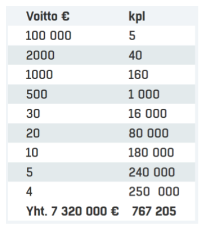

In [ ]:
## Code here

10.4 Laske edellisen tehtävän Ässä-arvan odotusarvo ja keskihajonta. Onko Ässä-arvan ostaminen kannattavaa? Mikä on tappioprosentti (tappio/hinta)? Laske myös 𝑃(𝑋≥10) ja 𝑃(1≤𝑋≤30).

In [ ]:
## Code here

10.5 Ruletissa voit panostaa rahaa jokaiselle luvulle väliltä 0-36. Mikäli ruletin pallo pysähtyy panostetulle luvulle, voitat panostamasi summan 36 kertaisena. Mikä on ruletin tappioprosentti? Huom., muut panostusmahdollisuudet (pariton/parillinen, musta/punainen, iso/pieni, rivit/sarakkeet) eivät muuttaisi tappioprosenttia.

In [ ]:
## Code here

10.6. Lotossa arvotaan 7 oikeaa numeroa 40:stä numerosta. Veikkaaja valitsee itse myös 7 numeroa ja jää voitolle alla olevan taulukon mukaisen summan euroina sen perusteella kuinka monta numero hän sai oikein. Yksi lottoarpa maksaa siis yhden euron ja vasta 3:lla oikealla numerolla jää voitolle. Päävoitosta jää voitolle 3 250 000. Muodosta tilanteesta todennäköisyysjakauma. Mikä on odotusarvo ja tappioprosentti? (Vinkki: oikeiden numeroiden todennäköisyydet kannattaa laskea binomikertoimella.)
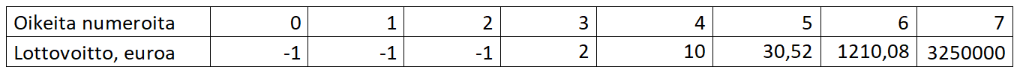

In [ ]:
## Code here